In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

digits = load_digits()

In [7]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


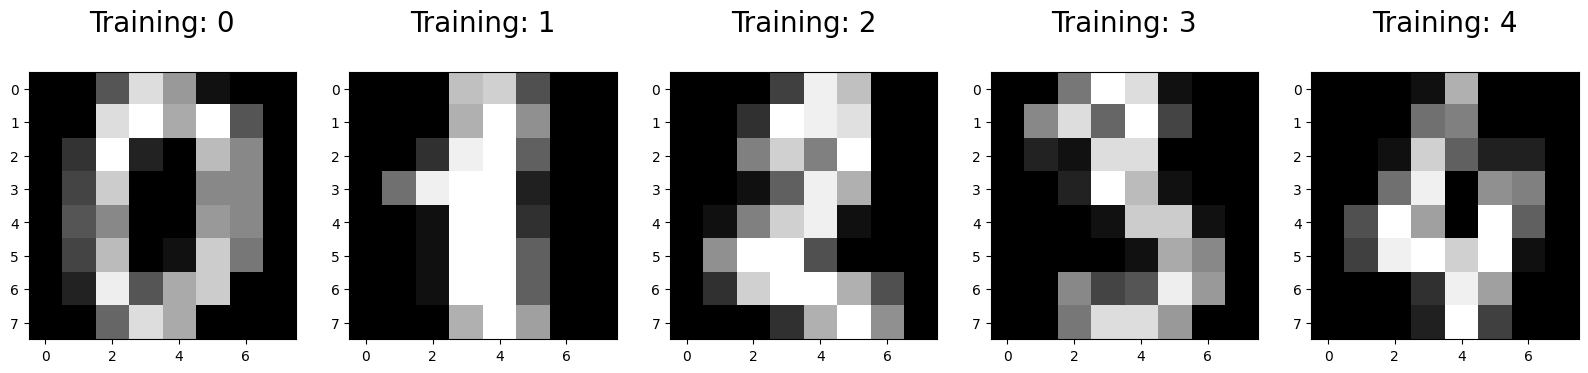

In [8]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [10]:
print(X_train.shape)

(1383, 64)


In [11]:
print(y_train.shape)

(1383,)


In [12]:
print(X_test.shape)

(414, 64)


In [13]:
print(y_test.shape)

(414,)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

regressor = LogisticRegression(max_iter=200)
regressor.fit(X_train,  y_train)

LogisticRegression(max_iter=200)

In [16]:
print(regressor.predict(X_test[0].reshape(1, -1)))

[4]


In [17]:
regressor.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [20]:
y_pred = regressor.predict(X_test)

In [19]:
score = regressor.score(X_test, y_test)
print(score)

0.9492753623188406


In [21]:
c_matrix = metrics.confusion_matrix(y_test, y_pred)
print(c_matrix)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy score: 0.9492753623188406')

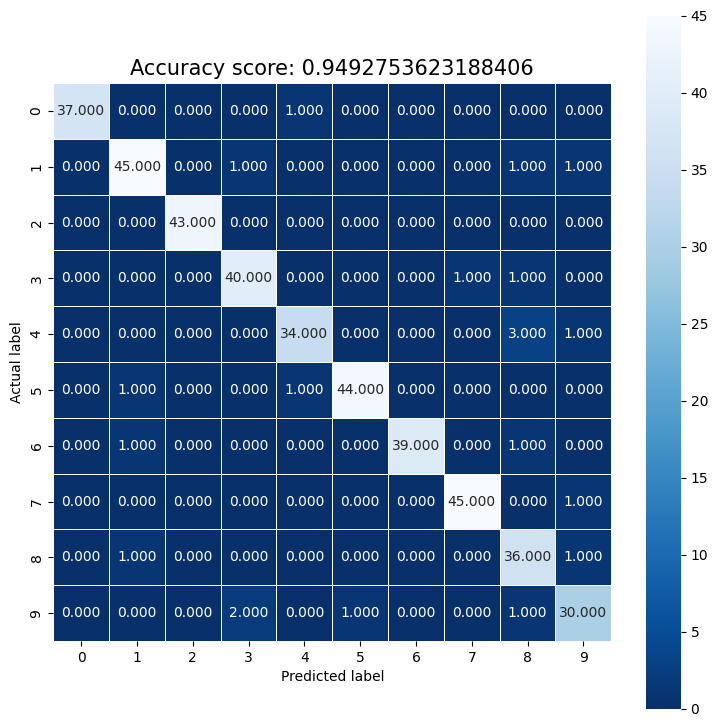

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(c_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size=15)

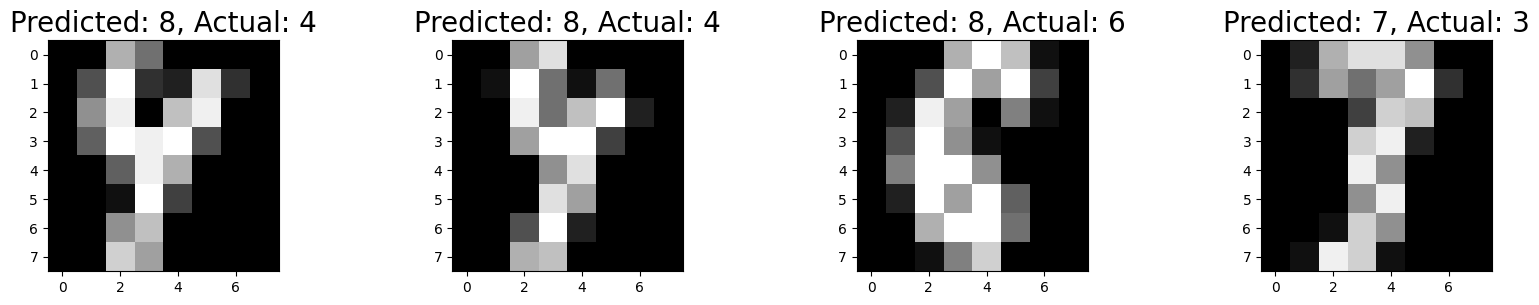

In [26]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(y_pred, y_test):
    if predict!=actual:
        misclassifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}" .format(y_pred[wrong], y_test[wrong]), fontsize=20)

In [27]:
from sklearn.metrics import accuracy_score

print("Accuracy from confusion matrix:", 393 / 450)
print("Accuracy from sklearn:", accuracy_score(y_test, y_pred))

Accuracy from confusion matrix: 0.8733333333333333
Accuracy from sklearn: 0.9492753623188406
